<a href="https://colab.research.google.com/github/MichelBMachado/MAC024/blob/main/Mola_Helicoidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considere uma linha fabril que produz molas helicoidais. Devido a problemas
de desgaste das maquinas envolvidas na produção e fatores humanos, os componentes são produzidos dentro dos seguintes limites de variação. O diametro externo varia uniformemente em torno de D = 80 ± 3 mm. Os seguintes parametros tem variação com distribuição normal como segue: d = 20 ± 1 mm, α = 15 ± 2 graus e n = 10 espiras. O material fornecido apresenta as seguintes variações (com distribuição normal): E = 200±3 GPa e G = 80±1 GPa.
Forneça um grafico com a variação do deslocamento da mola, mostrando sua media e desvio padrão, sabendo que as carga de serviço maxima é 10.5 kN. Para
uma carga de 9.2 kN, qual a probabilidade de falha da mola sabendo que a tensão limite do material e 600 MPa.

D = 80 ± 3 mm

d = 20 ± 1 mm

$\alpha$ = 15 ± 2 graus

E = 200 ± 3 GPa

G = 80 ± 1 GPa

n = 10 espiras 

$\sigma_{lim}$ = 600 MPa

P = 10,5 kN


In [ ]:
import numpy as np
import pylab as pl
import math as mt

### Deslocamento da mola

In [ ]:
def calcula_delta(P, D, d, n, alpha):                             #Função para o cálculo do deslocamento

  delta = ((8*P*n*D**3)/(np.cos(alpha)*(d**4)))*(((2 + d**2/(2*D**2))*(np.sin(alpha)**2)/E) + ((1 + (d**2/2*D**2))*(np.cos(alpha)**2)/(E*G)))
  return delta

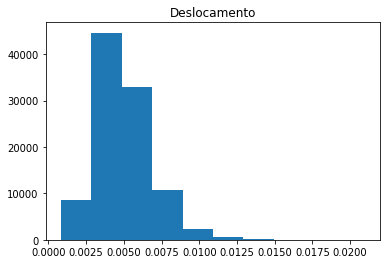

A média do deslocamento é: 0.00497544390109856
O desvio padrão do deslocamento é: 0.0017963474066250709


In [ ]:
N = 100000

D = np.random.normal(loc = 0.08, scale = 0.003, size = N)
d = np.random.normal(loc = 0.02, scale = 0.001, size = N)
alpha = np.random.normal(loc = np.pi/12, scale = np.pi/90, size = N)
E = np.random.normal(loc = 80e9, scale = 1e9, size = N)
G = np.random.normal(loc = 200e9, scale = 3e9, size = N)
n = 10
P = 10.5e3

delta = calcula_delta(P,D,d,n,alpha)


pl.hist(delta)
pl.title('Deslocamento')
pl.show()
print("A média do deslocamento é:", np.mean(delta))
print("O desvio padrão do deslocamento é:", np.std(delta))


### Probabilidade de falha da mola

In [ ]:
def calcula_sigma(P, D, alpha):                                   #Função para o cálculo da tensão normal 

  sigma = (16*P*D/(np.pi*d**3))*(1 + d/(4*D))*np.sin(alpha) 
  return sigma

In [ ]:
def calcula_tau(P, D, alpha):                                     #Função para o cálculo da tensão cisalhante

  tau = (8*P*D/(np.pi*d**3))*(1 + d/(2*D))*np.cos(alpha)
  return tau     

In [ ]:
P = 9.2e3                                 #Carregamento aplicado à mola
sigma_lim = 600e6                         #Tensão limite do material
sigma = calcula_sigma(P, D, alpha)        
tau = calcula_tau(P, D, alpha)
k = 0                                     #Quantidade de eventos cujas tensões internas ultrapassaram a tensão limite

for i in range(N):
  if (sigma[i]**2 + 4*(tau[i]**2))**(1/2) >= sigma_lim:
    k += 1

print("Probabilidade de falha da mola:", k/N*100,"%")




Probabilidade de falha da mola: 19.6 %
